In [1]:
import pandas as pd, numpy as np, re, os
from evaluation import Evaluator, compilerPatterns, ResultsFromMeanStdDF
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

In [3]:
def plotLossOnAx(ax, lossDF, label, **kwargs):
   stdKwargs = dict(alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
                            linewidth=4, antialiased=True)
   stdKwargs.update(kwargs)
   ax.plot(lossDF['mean'], label = label )
   ax.fill_between(lossDF.index, lossDF['mean']-lossDF['std'], 
                  lossDF['mean']+lossDF['std'], **stdKwargs)

In [4]:
paths = [ os.path.join(dataset.name, experiment.name) 
         for dataset in os.scandir('experiments') if dataset.is_dir() and 'grisoni' in dataset.name 
         for experiment in os.scandir(dataset.path)  ]

In [42]:
paths

['grisoniAug5_SELFIES-RNN/2hl_256hu_512bs_0.001lr',
 'grisoniAug5_SELFIES-RNN/2hl_512hu_256bs_0.001lr',
 'grisoniAug5_SELFIES-RNN/2hl_512hu_512bs_0.001lr',
 'grisoniAug5_SELFIES-RNN/3hl_256hu_256bs_0.001lr',
 'grisoniAug5_SELFIES-RNN/2hl_256hu_256bs_0.001lr',
 'grisoniAug5_SELFIES-RNN/3hl_256hu_512bs_0.001lr',
 'grisoniAug5_SELFIES-RNN/3hl_512hu_256bs_0.001lr',
 'grisoniAug5_SELFIES-RNN/3hl_512hu_512bs_0.001lr',
 'grisoniAug5_SMILES-RNN/2hl_256hu_512bs_0.001lr',
 'grisoniAug5_SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'grisoniAug5_SMILES-RNN/2hl_512hu_512bs_0.001lr',
 'grisoniAug5_SMILES-RNN/3hl_256hu_256bs_0.001lr',
 'grisoniAug5_SMILES-RNN/2hl_256hu_256bs_0.001lr',
 'grisoniAug5_SMILES-RNN/3hl_256hu_512bs_0.001lr',
 'grisoniAug5_SMILES-RNN/3hl_512hu_256bs_0.001lr',
 'grisoniAug5_SMILES-RNN/3hl_512hu_512bs_0.001lr',
 'grisoniAug5_fragSMILES-RNN/2hl_256hu_512bs_300es_0.001lr',
 'grisoniAug5_fragSMILES-RNN/2hl_512hu_256bs_300es_0.001lr',
 'grisoniAug5_fragSMILES-RNN/2hl_512hu_512bs_300es_0.0

In [6]:
evaluators = [Evaluator(path, loadCSV=True) for path in paths]

## loss

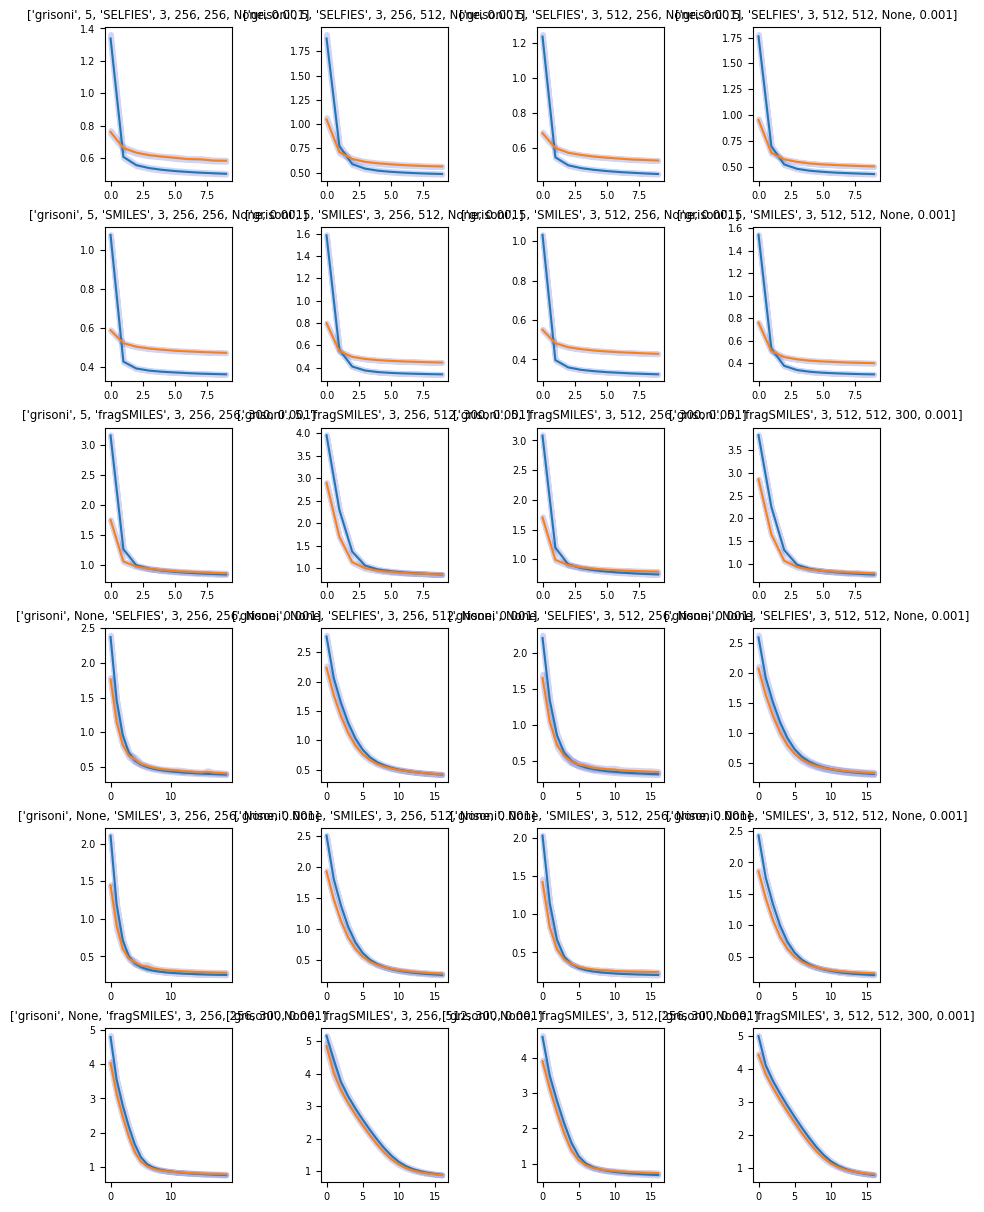

In [44]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})

fig,axes = plt.subplots(nrows=6, ncols=4, figsize=(10,15),gridspec_kw={'wspace':0.7, 'hspace':0.3})
onlyToEval = [evaluator for evaluator in evaluators if evaluator.params['hl']==3]
for path, evaluator, ax in zip(paths, onlyToEval, axes.flatten()):
    train,test = evaluator.getTrainTestLosses()
    plotLossOnAx(ax, train, label='Training')
    plotLossOnAx(ax, test, label='Validation')
    ax.set_title(list((evaluator.dataInfo|evaluator.params).values()))

## Syntax metrics

In [7]:
from scipy import stats

In [8]:
genDFs=pd.concat( [evaluator.getResultsGens() for evaluator in evaluators if not evaluator.gens.empty], ignore_index=True )

In [9]:
genDFs['valid%']=genDFs['valid']/genDFs['amount']
genDFs['unique%']=genDFs['unique']/genDFs['valid']
genDFs['novel%']=genDFs['novel']/genDFs['unique']

In [10]:
params=[2,512,-1,0.001,512,6000,10,1.0]
paramsFrag = [2,512,300,0.001,512,6000,16,1.0]

In [11]:
params5=[2,512,-1,0.001,256,6000,3,1.0]
paramsFrag5 = [2,512,300,0.001,256,6000,4,1.0]

In [12]:
genGrp=genDFs.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(),as_index=True, dropna=False)

/tmp/ipykernel_1315920/1376500511.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  genGrp=genDFs.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(),as_index=True, dropna=False)


In [13]:
genStats=genGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ].drop(columns='fold')

In [14]:
genStats=ResultsFromMeanStdDF(genStats)

In [59]:
genStats

valid  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                      
grisoni -1  SELFIES    2  256 -1   0.001 256 6000   6     1.0     6000.0 ± 0.0   
                                         512 6000   10    1.0     5999.8 ± 0.4   
                          512 -1   0.001 256 6000   6     1.0     6000.0 ± 0.0   
                                         512 6000   10    1.0     6000.0 ± 0.0   
                       3  256 -1   0.001 256 6000   6     1.0     5999.8 ± 0.4   
                                         512 6000   10    1.0     5999.4 ± 0.9   
                          512 -1   0.001 256 6000   6     1.0     6000.0 ± 0.0   
                                         512 6000   10    1.0     6000.0 ± 0.0   
            SMILES     2  256 -1   0.001 256 6000   6     1.0  3800.0 ± 1000.0   
                                         512 6000   10    1.0   4100.0 ± 100.0   
                          512 -1   0.001 256 6000   6     1.0   4600.0 ± 300.0   
                                         512 6000   10    1.0    4930.0 ± 70.0   
                       3  256 -1   0.001 256 6000   6     1.0  4000.0 ± 1000.0   
                                         512 6000   10    1.0   4500.0 ± 100.0   
                          512 -1   0.001 256 6000   6     1.0    5120.0 ± 90.0   
                                         512 6000   10    1.0    5090.0 ± 50.0   
            fragSMILES 2  256  300 0.001 256 6000   8     1.0   4700.0 ± 200.0   
                                         512 6000   16    1.0    5010.0 ± 70.0   
                          512  300 0.001 256 6000   8     1.0    5200.0 ± 90.0   
                                         512 6000   16    1.0    5280.0 ± 20.0   
                       3  256  300 0.001 256 6000   8     1.0   4600.0 ± 100.0   
                                         512 6000   16    1.0    4800.0 ± 90.0   
                          512  300 0.001 256 6000   8     1.0    5050.0 ± 60.0   
                                         512 6000   16    1.0    5150.0 ± 50.0   
         5  SELFIES    2  256 -1   0.001 256 6000   3     1.0     6000.0 ± 0.0   
                                         512 6000   3     1.0     5999.8 ± 0.4   
                          512 -1   0.001 256 6000   3     1.0     6000.0 ± 0.0   
                                         512 6000   3     1.0     6000.0 ± 0.0   
                       3  256 -1   0.001 256 6000   3     1.0     5999.8 ± 0.4   
                                         512 6000   3     1.0     5999.8 ± 0.4   
                          512 -1   0.001 256 6000   3     1.0     6000.0 ± 0.0   
                                         512 6000   3     1.0     6000.0 ± 0.0   
            SMILES     2  256 -1   0.001 256 6000   3     1.0   4900.0 ± 100.0   
                                         512 6000   3     1.0    4730.0 ± 80.0   
                          512 -1   0.001 256 6000   3     1.0    5300.0 ± 40.0   
                                         512 6000   3     1.0    5220.0 ± 50.0   
                       3  256 -1   0.001 256 6000   3     1.0    5170.0 ± 30.0   
                                         512 6000   3     1.0    5020.0 ± 50.0   
                          512 -1   0.001 256 6000   3     1.0    5470.0 ± 50.0   
                                         512 6000   3     1.0    5390.0 ± 30.0   
            fragSMILES 2  256  300 0.001 256 6000   4     1.0    5230.0 ± 70.0   
                                         512 6000   4     1.0    5070.0 ± 60.0   
                          512  300 0.001 256 6000   4     1.0    5420.0 ± 60.0   
                                         512 6000   4     1.0    5320.0 ± 70.0   
                       3  256  300 0.001 256 6000   4     1.0    5150.0 ± 30.0   
                                         512 6000   4     1.0    4930.0 ± 60.0   
                          512  300 0.001 256 6000   4     1.0    5390.0 ± 30.0   
                                         512 6000   4  

In [15]:
genStats.query(' ( aug==5 and hl==2 and hu==512 and bs==256 ) or ( aug!=5 and hl==2 and hu==512 and bs==512 ) ')

valid  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   6000.0 ± 0.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  4930.0 ± 70.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  5280.0 ± 20.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0   6000.0 ± 0.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  5300.0 ± 40.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  5420.0 ± 60.0   

                                                                      unique  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   5999.0 ± 2.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  4920.0 ± 70.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  5270.0 ± 30.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0   6000.0 ± 0.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  5300.0 ± 40.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  5410.0 ± 60.0   

                                                                       novel  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   5971.0 ± 2.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  4770.0 ± 60.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  5110.0 ± 40.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0   5997.0 ± 1.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  5280.0 ± 40.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  5300.0 ± 60.0   

                                                                      valid%  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0      1.0 ± 0.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0    0.82 ± 0.01   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0   0.88 ± 0.004   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0      1.0 ± 0.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  0.883 ± 0.007   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  0.903 ± 0.009   

                                                                       unique%  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                      
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  0.9998 ± 0.0003   
            SMILES     2  512 -1   0.001 512 6000   10    1.0    0.997 ± 0.001   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  0.9976 ± 0.0005   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0        1.0 ± 0.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  0.9999 ± 0.0002   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  0.9991 ± 0.0006   

                                                                        novel%  
dataset aug notation   hl hu  es   lr    bs  amount epoch T                     
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  0.9953 ± 0.0006  
            SMILES     2  512 -1   0.001 512 6000   10    1.0     0.97 ± 0.002  
            fragSMILES 2  512  300 0.001 512 6000   16    1.0    0.971 ± 0.004  
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  0.9996 ± 0.0002  
            SMILES     2  512 -1   0.001 256 6000   3     1.0   0.997 ± 0.0009  
            fragSMILES 2  512  300 0.001 256 6000   4     1.0     0.98 ± 0.003

In [16]:
genPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                genGrp.get_group(('grisoni',-1,notation,*params))[metric],
                genGrp.get_group(('grisoni',-1,'fragSMILES',*paramsFrag))[metric],
                ).pvalue for metric in genStats.columns} for notation in ['SMILES','SELFIES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                genGrp.get_group(('grisoni',5,notation,*params5))[metric],
                genGrp.get_group(('grisoni',5,'fragSMILES',*paramsFrag5))[metric],
                ).pvalue for metric in genStats.columns} for notation in ['SMILES','SELFIES']
                }
                , orient='index'
            )

/usr/lib/python3/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
genPvals

,valid,unique,novel,valid%,unique%,novel%
SMILESx1,5.836981e-06,4.036319e-06,6.399316e-06,5.836981e-06,0.517643,8.938461e-01
SELFIESx1,2.642000e-12,3.675778e-12,8.476472e-11,2.642000e-12,0.000030,1.109582e-06
SMILESx5,5.479541e-03,6.740004e-03,4.799941e-01,5.479541e-03,0.020852,1.086421e-06
SELFIESx5,1.224551e-08,1.288487e-08,3.641024e-09,1.224551e-08,0.011307,2.598607e-07


In [18]:
genPvals.map(lambda x: x<0.05)

,valid,unique,novel,valid%,unique%,novel%
SMILESx1,True,True,True,True,False,False
SELFIESx1,True,True,True,True,True,True
SMILESx5,True,True,False,True,True,True
SELFIESx5,True,True,True,True,True,True


In [63]:
genStats.to_csv('results/07_grisoniSyntax.csv')

## Chiral Metrics

In [45]:
genChirDFs=pd.concat( [evaluator.getChiralResultsGens() for evaluator in evaluators if not evaluator.gens.empty], ignore_index=True)

In [46]:
genChirDFs

,dataset,aug,notation,hl,hu,bs,es,lr,fold,amount,epoch,T,chirals,invalid,valid,unique,novel
0,grisoni,5,SELFIES,2,256,512,None,0.001,0,6000,3,1.0,1694,647,1047,1047,1047
1,grisoni,5,SELFIES,2,256,512,None,0.001,1,6000,3,1.0,1820,753,1067,1067,1067
2,grisoni,5,SELFIES,2,256,512,None,0.001,2,6000,3,1.0,1818,725,1093,1093,1093
3,grisoni,5,SELFIES,2,256,512,None,0.001,3,6000,3,1.0,1860,766,1094,1094,1094
4,grisoni,5,SELFIES,2,256,512,None,0.001,4,6000,3,1.0,1867,733,1134,1134,1134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,grisoni,None,fragSMILES,3,512,512,300,0.001,0,6000,16,1.0,1751,347,1404,1400,1356
236,grisoni,None,fragSMILES,3,512,512,300,0.001,1,6000,16,1.0,1762,400,1362,1360,1311
237,grisoni,None,fragSMILES,3,512,512,300,0.001,2,6000,16,1.0,1928,373,1555,1545,1476
238,grisoni,None,fragSMILES,3,512,512,300,0.001,3,6000,16,1.0,1795,417,1378,1374,1325


In [52]:
genChirDFs['invalid%']=genChirDFs['invalid']/genChirDFs['chirals']
genChirDFs['valid%']=genChirDFs['valid']/genChirDFs['chirals']
genChirDFs['unique%']=genChirDFs['unique']/genChirDFs['valid']
genChirDFs['novel%']=genChirDFs['novel']/genChirDFs['unique']

In [53]:
genChirGrp=genChirDFs.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(),as_index=True, dropna=False)

/tmp/ipykernel_1315920/3061462175.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  genChirGrp=genChirDFs.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(),as_index=True, dropna=False)


In [54]:
genChirStats=genChirGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ].drop(columns='fold')

In [55]:
genChirStats=ResultsFromMeanStdDF(genChirStats)

In [56]:
genChirStats.query(' ( aug==5 and hl==2 and hu==512 and bs==256 ) or ( aug!=5 and hl==2 and hu==512 and bs==512 ) ')

chirals  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                     
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   1820.0 ± 40.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0   1770.0 ± 70.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0   1770.0 ± 90.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  1900.0 ± 100.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  1800.0 ± 200.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  2000.0 ± 100.0   

                                                                    invalid  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                   
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  670.0 ± 40.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  400.0 ± 40.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  330.0 ± 30.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  520.0 ± 40.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  320.0 ± 50.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  290.0 ± 30.0   

                                                                        valid  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                     
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   1150.0 ± 20.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0   1370.0 ± 40.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0   1440.0 ± 70.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0   1380.0 ± 80.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  1500.0 ± 100.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  1700.0 ± 100.0   

                                                                       unique  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                     
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   1150.0 ± 20.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0   1370.0 ± 40.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0   1440.0 ± 60.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0   1380.0 ± 80.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  1500.0 ± 100.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  1700.0 ± 100.0   

                                                                        novel  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                     
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   1140.0 ± 20.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0   1320.0 ± 40.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0   1400.0 ± 60.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0   1370.0 ± 80.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  1500.0 ± 100.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  1600.0 ± 100.0   

                                                                    invalid%  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0    0.37 ± 0.01   
            SMILES     2  512 -1   0.001 512 6000   10    1.0    0.22 ± 0.02   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0    0.19 ± 0.01   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  0.274 ± 0.009   
            SMILES     2  512 -1   0.001 256 6000   3     1.0    0.17 ± 0.01   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0    0.15 ± 0.01   

                                                                      valid%  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001

In [57]:
genChirPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                genChirGrp.get_group(('grisoni',-1,notation,*params))[metric],
                genChirGrp.get_group(('grisoni',-1,'fragSMILES',*paramsFrag))[metric],
                ).pvalue for metric in genChirStats.columns} for notation in ['SELFIES','SMILES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                genChirGrp.get_group(('grisoni',5,notation,*params5))[metric],
                genChirGrp.get_group(('grisoni',5,'fragSMILES',*paramsFrag5))[metric],
                ).pvalue for metric in genChirStats.columns} for notation in ['SELFIES','SMILES']
                }
                , orient='index'
            )

/usr/lib/python3/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [58]:
genChirPvals

,chirals,invalid,valid,unique,novel,invalid%,valid%,unique%,novel%
SELFIESx1,0.335176,4.502110e-07,0.000010,0.000010,0.000013,2.852547e-08,2.852547e-08,0.003060,1.320359e-04
SMILESx1,0.918940,1.951212e-02,0.075640,0.070225,0.039030,2.784226e-03,2.784226e-03,0.947904,1.124316e-01
SELFIESx5,0.418123,1.126787e-05,0.001292,0.001373,0.002686,8.873469e-08,8.873469e-08,0.013913,5.176287e-07
SMILESx5,0.238558,4.282225e-01,0.073160,0.076939,0.152536,3.088840e-02,3.088840e-02,0.013913,1.895506e-06


In [59]:
genChirPvals.map(lambda x: x<0.05)

,chirals,invalid,valid,unique,novel,invalid%,valid%,unique%,novel%
SELFIESx1,False,True,True,True,True,True,True,True,True
SMILESx1,False,True,False,False,True,True,True,False,False
SELFIESx5,False,True,True,True,True,True,True,True,True
SMILESx5,False,False,False,False,False,True,True,True,True


In [62]:
genChirStats.to_csv('results/07_grisoniChirals.csv')

## Metrics of Novels

In [32]:
novels = pd.concat( [evaluator.getResultsNovels() for evaluator in evaluators], ignore_index=True)

In [33]:
novGrp=novels.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(), as_index=True, dropna=False)

/tmp/ipykernel_1315920/2569388527.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  novGrp=novels.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(), as_index=True, dropna=False)


In [34]:
novStats=novGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ].drop(columns='fold')

In [35]:
novStats = ResultsFromMeanStdDF(novStats)

In [38]:
novStats.query(' ( aug==5 and hl==2 and hu==512 and bs==256 ) or ( aug!=5 and hl==2 and hu==512 and bs==512 ) ')

FCD/Test  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                  
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0    5.5 ± 0.2   
            SMILES     2  512 -1   0.001 512 6000   10    1.0    0.8 ± 0.1   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  0.69 ± 0.05   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0    3.4 ± 0.1   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  0.99 ± 0.07   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  0.72 ± 0.06   

                                                                    SNN/Test  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  0.377 ± 0.005   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  0.486 ± 0.003   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0   0.51 ± 0.003   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  0.375 ± 0.001   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  0.428 ± 0.001   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0    0.5 ± 0.006   

                                                                 Scaf/Test  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                  
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  0.25 ± 0.04   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  0.38 ± 0.04   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  0.38 ± 0.02   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  0.25 ± 0.02   
            SMILES     2  512 -1   0.001 256 6000   3     1.0   0.3 ± 0.04   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  0.38 ± 0.02   

                                                                        IntDiv  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                      
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0     0.88 ± 0.001   
            SMILES     2  512 -1   0.001 512 6000   10    1.0    0.869 ± 0.001   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  0.8689 ± 0.0008   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  0.8764 ± 0.0006   
            SMILES     2  512 -1   0.001 256 6000   3     1.0    0.872 ± 0.001   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0    0.869 ± 0.002   

                                                                       IntDiv2  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                      
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0    0.875 ± 0.001   
            SMILES     2  512 -1   0.001 512 6000   10    1.0    0.863 ± 0.001   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  0.8634 ± 0.0008   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  0.8715 ± 0.0006   
            SMILES     2  512 -1   0.001 256 6000   3     1.0    0.867 ± 0.001   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0    0.863 ± 0.002   

                                                                     Filters  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  0.578 ± 0.008   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  0.849 ± 0.005   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  0.845 ± 0.003   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0    0.68 ± 0.01   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  0.841 ± 0.006   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0    0.85 ± 0.01   

                                                                      logP  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                  
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   

In [28]:
novStats.T.to_csv('results/07_grisoniNovelMetrics.csv')

In [39]:
novPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                novGrp.get_group(('grisoni',-1,notation,*params))[metric],
                novGrp.get_group(('grisoni',-1,'fragSMILES',*paramsFrag))[metric],
                ).pvalue for metric in novStats.columns} for notation in ['SELFIES','SMILES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                novGrp.get_group(('grisoni',5,notation,*params5))[metric],
                novGrp.get_group(('grisoni',5,'fragSMILES',*paramsFrag5))[metric],
                ).pvalue for metric in novStats.columns} for notation in ['SELFIES','SMILES']
                }
                , orient='index'
            )

In [40]:
novPvals

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
SELFIESx1,2.511745e-11,1.289718e-11,0.000269,2.613503e-07,1.119802e-07,1.970335e-12,0.103788,1.747794e-09,0.306073,0.110658
SMILESx1,3.568206e-02,5.545198e-07,0.810828,7.489774e-01,9.099706e-01,2.416050e-01,0.339026,8.190494e-01,0.202524,0.138269
SELFIESx5,4.726027e-11,7.497243e-11,0.000010,4.327195e-05,1.461162e-05,4.268837e-08,0.498604,1.874516e-10,0.616179,0.315130
SMILESx5,1.253824e-04,5.887502e-09,0.002278,1.289053e-02,1.076266e-02,5.598158e-01,0.329676,2.509228e-01,0.555078,0.130280


In [41]:
novPvals.map(lambda x: x<0.05)

,FCD/Test,SNN/Test,Scaf/Test,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
SELFIESx1,True,True,True,True,True,True,False,True,False,False
SMILESx1,True,True,False,False,False,False,False,False,False,False
SELFIESx5,True,True,True,True,True,True,False,True,False,False
SMILESx5,True,True,True,True,True,False,False,False,False,False
